<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression

#### Learning Objectives
- Define data modeling and simple linear regression.
- Build a linear regression model using a data set that meets the linearity assumption using the scikit-learn library.
- Understand and identify multicollinearity in a multiple regression.

In [ ]:
#Beta-0 is the intercept
#Beta-1 is the coefficient of independent variable (x)
#y is the dependent variable, i.e. its outcome is dependent on x


## 1. What is linear regression?

Linear regression is a way of modelling some depdendent variable $y$ as a linear combination of one or more independent variables $x$.

We are often taught the formula for a straight line is: $y = mx + b$.

This can alternatively be written as: $$y = \beta_{0} + \beta_{1} x$$

### 1.1 What are the independent and dependent variables in this formula?

### 1.2 What's the difference between regression and classification?

In regression tasks, the **dependent** variable is continuous. In classification tasks, the **dependent** variable is categorical. 

An example of a regression problem could be: Predicting Google's share price.

An example of a classification task could be: Predicting a person's favourite fruit.

It's important to note that features in both classification and regression tasks can be a combination of continuous and categorical (we often need to transform categorical features into continuous ones or vice versa depending on the type of model we're using). 

### Exercise

Are the following examples of regression or classification? Remember, when we're deciding whether something is a classification task or a regression task, the **only** thing that matters is whether the **dependent** variable is continuous or categorical. 

(a) Predicting someone's weight based on their favourite fruit
(b) Predicting someone's eye colour based on their weight
(c) Predicting which party will have a majority 
(d) Predicting a party's vote share

### 1.3 What do we mean by linear?

An equation is **linear** if the highest degree of any of the the independent variables (i.e. $x$) is 1. If there's a term containing $x^2$ for example, the equation is no longer linear because the independent variable is being raised to a power higher than 1. 

https://en.wikipedia.org/wiki/Degree_of_a_polynomial

### 1.4 What does 'training' or 'fitting' a linear regression model mean? 

Linear regression is our first example of supervised learning. In supervised learning tasks, we:

1. Obtain a dataset that consists of lots of data points, where each point consists of:

    * A value for our label/response/target/dependent variable $y$
    * Corresponding values for our features/predictors/independent variables $x$
    
    You can think of a single 'data point' or 'observation' as corresponding to a single row in a Pandas dataframe
    
2. Split the dataset into a training set that we'll use to fit or train our model, and a testing set that we'll use to evaluate our model's accuracy. A typical split is 80% of our data will be used for training, and 20% for testing. 

3. Train or fit our model. This will be different for different models. 

In linear regression, training is the process of finding the linear equation that best fits our data.

In other words, we're finding the $\beta$ values or **model coefficients** that give us the line of best fit:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are trying to find the line (mathematically) that minimizes the **sum of squared residuals** (or "sum of squared errors").
- Once we've learned these coefficients, we can use the model to predict the values for $y$, the dependent variable (or 'response') for new data points where we only have access to $x$, the features.

![Estimating coefficients](./assets/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. We need evaluation metrics designed for comparing continuous values.

Here are three common evaluation metrics for regression problems:

**Mean absolute error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean squared error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root mean squared error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Let's compare these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.    Also, MSE is continuous and differentiable, making it easier to use than MAE for optimization.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

### 1.5 Why use linear regression?

Advantages of linear regression:

- Simple to explain.
- Highly interpretable.
- Model training and prediction are fast.
- No tuning is required (excluding regularization).
- Features don't need scaling.
- Can perform well with a small number of observations.
- Well understood.

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response.
- Performance is (generally) not competitive with the best supervised learning methods due to high bias.
- Can't automatically learn feature interactions.


## 2. Let's try it out

Let's work through a simple example 'by hand' to understand how linear regression works. 

### 2.1 Read in some dummy data

Imagine we have a data frame that describes the vote share of the Labour Party vs the percentage of 18-25 year olds in a particular constituency. (Note: this is dummy data!)

In [1]:
import pandas as pd
import numpy as np

votes_df = pd.DataFrame({'vote_share':[44, 20, 67, 12, 80],'young_population':[24, 8, 28, 7, 35]})
votes_df.head()

vote_share  young_population
0          44                24
1          20                 8
2          67                28
3          12                 7
4          80                35

### 2.2 Write down the general form of equation we're trying to fit to our data

Using the variable names 'vote_share' and 'young_population', write down the general form of linear equation we're trying to fit to our data.

What are the values we're trying to find? The model fits the model with coefficient and y-intercept values.

In [ ]:
# Dependent variable is 'vote share'; 
# Independent variable is 'young_population'
# Assuming linear relationship, vote_share = y_intercept + (coefficient x young_population)

### 2.3 Use scikit-learn to fit our model and make predictions

This bit is super simple with scikit-learn! We import scikit-learn, initialise the linear regression model, and then fit it to our data:

**Step 1:** Import the class you plan to use from scikit-learn

In [2]:
from sklearn.linear_model import LinearRegression # import

**Step 2:** Initialise the model

* We've created an object that "knows" how to do linear regression, and is just waiting for data.
* The name of the object does not matter.
* All parameters not specified are set to their defaults.
* We can specify tuning parameters (aka "hyperparameters") during this step. 


In [3]:
linreg = LinearRegression() # initialise 

**Step 3:** Fit the model with data (aka "model training").

- Model is "learning" the relationship between X and y in our "training data."
- Process through which learning occurs varies by model.
- Occurs in-place.

Note that 'X' and 'y' correspond to the correct columns in our 'votes' dataframe.

In [4]:
y = votes_df['vote_share']
# NumPy reshape() re-shapes the array because machine-learning models only accept 2D arrays, which is why we add column below
X = np.array(votes_df['young_population']).reshape(-1, 1)

linreg.fit(X, y) # fit your model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
type(X)

numpy.ndarray

Hooray! `linreg` is now a trained model!

**Step 4:** Inspect our trained model.

Now we've fitted our linear regression model, we can look at the coefficients it's learned and evaluate how well the model fits our data using the **sum of squared errors** metric we defined earlier

In [6]:
coefficients = linreg.coef_
print(coefficients)

[2.3117304]


In [7]:
intercept = linreg.intercept_
print(intercept)


-2.5593000648088235


Now we know what the learned coefficient and intercept of our model is, let's write down a formula describing the learned relationship between vote share and young population:

In [8]:
y_pred = coefficients[0] * X + intercept
y_pred

array([[52.92222942],
       [15.9345431 ],
       [62.169151  ],
       [13.6228127 ],
       [78.35126377]])

We can also plot the line of best fit against our data

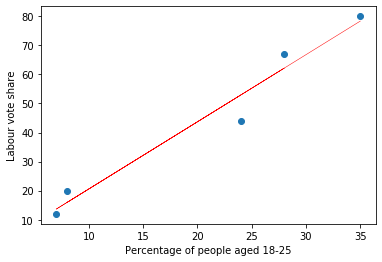

In [10]:
import matplotlib.pyplot as plt

# scatter function plots the actual data points
plt.scatter(X, y);

# plot function is for the 'line of best fit' (y_pred)
plt.plot(X, y_pred, 'r', linewidth=0.5);
plt.xlabel('Percentage of people aged 18-25');
plt.ylabel('Labour vote share');
plt.show();

In [ ]:
# Beta-0 (intercept) is also known as the 'constant'. 
# Sometimes it is removed in regression problems to make the model more significant but that is wrong

Interpreting the intercept ($\beta_0$):

- It is the value of $y$ when all independent variables are 0.
- Here, it is the estimated vote share when there are no 18-25 year olds in a constituency.
- **Note:** It does not always make sense to interpret the intercept; why? 

Interpreting the "youth" coefficient ($\beta_1$):

- **Interpretation:** An increase of 1% in youth population in a constituency is _associated with_ increasing the Labour vote share by $\beta_1$
- In this case, an increase of 1% in youth population in a constituency is _associated with_ increasing the Labour vote share by 2.3%
- This is not a statement of causation.
- $\beta_1$ would be **negative** if an increase in youth population was associated with a **decrease** in Labour vote share.
- $\beta_1$ would be **zero** if youth population is not at all associated with Labour vote share.

In [ ]:
# Beta-1 (model coefficient) determines how much the line slopes. 

**Step 5:** Evaluate our model

Exactly how well does our formula, or our 'line of best fit' fit our data?

Use our formula for **mean squared error** and **root mean squared error** to calculate this by hand. What's `y_pred` and `y_actual` in this case?


In [21]:
# y_pred is array of predicted values corresponding to same number of values in X
# y is list of actual values corresponding to same number of values in X
# Formula for MSE is: (y - y_pred)**2 / number of values in y

In [11]:
sum_sq_residuals = 0

# For loop for element in full range of variable y length
for i in range(0,len(y)):
    print(i)
    sum_sq_residuals += (y[i] - y_pred[i]) ** 2
    
print(sum_sq_residuals)

0
1
2
3
4
[124.82307194]


In [12]:
# Mean Squared Error
sum_sq_residuals/len(y)

array([24.96461439])

In [13]:
# Root Mean Squared Error is square root of MSE
np.sqrt(sum_sq_residuals/len(y))

array([4.99646019])

We can also calculate the **mean squared error** and **root mean squared error** using scikit-learn

In [14]:
from sklearn.metrics import mean_squared_error

y_actual = y
y_pred = y_pred

mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)

print('Mean squared error: %f'% mse)
print('Root mean squared error: %f'% rmse)

Mean squared error: 24.964614
Root mean squared error: 4.996460


In [ ]:
# RMSE says that there is approx. 5% error in prediction of percentage vote-share of Labour

**Step 6:** Predict the response for a new data point

This is the exciting bit! New observations are called "out-of-sample" data. Our model uses the information it learned during the model training process.

Let's ask the model to make two predictions:

* One in a constituency where the youth population is 17%
* Another where the youth population is 20%

To do this, our feature matrix is always a 2-D array where each row is a list of features. Since we only have a single feature, the youth population, each row will contain only a single value.


In [15]:
#Our new unseen data with the values we want to predict - we use evaluation metrics to compare with the mean or other stats
X_new = [[17], [20]]
linreg.predict(X_new)

array([36.74011666, 43.67530784])

What we just predicted using our model is:

* In a constituency where the proportion of 18-25 year olds is 17%, the Labour vote share will be around 37%
* In a constituency where the proportion of 18-25 year olds is 20%, the Labour vote share will be around 44%


## 2. Linear regression with multiple independent variables

Performing linear regression with one independent variable is very straightforward. But most interesting, real life problems will involve many independent variables, not just one! The formula above can be generalised to $n$ independent variables as follows:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

- $y$ is the response, or dependent variable
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature).
- $\beta_n$ is the coefficient for $x_n$ (the nth feature).

A practical example of this sort of model applied to our vote share example might be:

$vote\:share = \beta_0 + \beta_1*young\:population + \beta_2*home\:ownership + \beta_3*unemployment\:rate$

## 3. Simple linear regression with the 2016 US Presidential Election dataset

Now let's try this method out with a much bigger dataset! Read in the dataset, which describes the Trump vote share for every county in the US for the 2016 US Presidential elections, together with demographic information for each county. 

We'll be using this dataset to investigate which demographic factors are the biggest drivers of Trump support, and ultimately predict vote share in new, out-of-sample counties.

### 3.1 Read in the training data

This consists of data for 80% of the counties in the US. The remaining 20% of counties will be our testing dataset; we won't read that in yet!


In [16]:
training_data = pd.read_csv('./data/us_presidential_votes_clean.csv')
training_data.head()

Trump  population_2010  persons_under_5_years_percent_2014  \
0  0.734358            54571                                 6.0   
1  0.773515           182265                                 5.6   
2  0.522714            27457                                 5.7   
3  0.769662            22915                                 5.3   
4  0.898519            57322                                 6.1   

   persons_under_18_years_percent_2014  age65plus  \
0                                 25.2       13.8   
1                                 22.2       18.7   
2                                 21.2       16.5   
3                                 21.0       14.8   
4                                 23.6       17.0   

   female_persons_percent_2014  White  Black  \
0                         51.4  0.779  0.187   
1                         51.2  0.871  0.096   
2                         46.6  0.502  0.476   
3                         45.9  0.763  0.221   
4                         50.5  0.960  0.018   

   american_indian_and_alaska_native_alone_percent_2014  \
0                                                0.5      
1                                                0.7      
2                                                0.6      
3                                                0.4      
4                                                0.6      

   asian_alone_percent_2014  ...  hispanicowned_firms_percent_2007  \
0                       1.1  ...                               0.7   
1                       0.9  ...                               1.3   
2                       0.5  ...                               0.0   
3                       0.2  ...                               0.0   
4                       0.3  ...                               0.0   

   womenowned_firms_percent_2007  manufacturers_shipments_2007_1000  \
0                           31.7                                  0   
1                           27.3                            1410273   
2                           27.0                                  0   
3                            0.0                                  0   
4                           23.2                             341544   

   merchant_wholesaler_sales_2007_1000  retail_sales_2007_1000  \
0                                    0                  598175   
1                                    0                 2966489   
2                                    0                  188337   
3                                    0                  124707   
4                                    0                  319700   

   retail_sales_per_capita_2007  \
0                         12003   
1                         17166   
2                          6334   
3                          5804   
4                          5622   

   accommodation_and_food_services_sales_2007_1000  building_permits_2014  \
0                                            88157                    131   
1                                           436955                   1384   
2                                                0                      8   
3                                            10757                     19   
4                                            20941                      3   

   land_area_in_square_miles_2010  Density  
0                          594.44     91.8  
1                         1589.78    114.6  
2                          884.88     31.0  
3                          622.58     36.8  
4                          644.78     88.9  

[5 rows x 49 columns]

Inspect the data dictionary, which is in the `data` folder under the filename `us_presidential_votes_dictionary.csv`

Familiarise yourself with the contents of the file.

* What does each row correspond to?   Each row corresponds to a county

* What's the column name of the independent variable?   'Trump'

* What are the column names of our dependent variables?  All other columns

### 3.2 Inspect the data

Use `sns.pairplot`, `sns.heatmap`, `describe` and `corr` to:

(a) Create a pairplot of all different pairings of variables in our dataset (histograms are distribution of single variable, scatterplot is variable vs variable distribution)

(b) Generate a correlation matrix

(c) Visualise the correlation matrix with a heatmap

Then, by visual inspection, discuss the following questions on your tables:

(a) Which variables look like they're most strongly associated or correlated with Trump support?

(b) Do the associations make intuitive sense? If not, why not? 

(c) Do some of the associations look like they describe causal relationships? Which ones? 



In [17]:
training_data.describe()

Trump  population_2010  persons_under_5_years_percent_2014  \
count  3112.000000     3.112000e+03                         3112.000000   
mean      0.636152     9.898104e+04                            5.886954   
std       0.156499     3.143192e+05                            1.183065   
min       0.041221     8.200000e+01                            1.500000   
25%       0.549478     1.130950e+04                            5.200000   
50%       0.667431     2.605050e+04                            5.800000   
75%       0.751471     6.708050e+04                            6.500000   
max       0.952727     9.818605e+06                           13.300000   

       persons_under_18_years_percent_2014    age65plus  \
count                          3112.000000  3112.000000   
mean                             22.537596    17.640199   
std                               3.333600     4.387073   
min                               7.400000     4.100000   
25%                              20.500000    14.800000   
50%                              22.400000    17.300000   
75%                              24.200000    19.925000   
max                              40.500000    52.900000   

       female_persons_percent_2014        White        Black  \
count                  3112.000000  3112.000000  3112.000000   
mean                     49.955752     0.854003     0.093004   
std                       2.205303     0.157884     0.144830   
min                      30.100000     0.059000     0.000000   
25%                      49.500000     0.807000     0.008000   
50%                      50.400000     0.920000     0.024000   
75%                      51.100000     0.960000     0.109000   
max                      56.800000     0.993000     0.851000   

       american_indian_and_alaska_native_alone_percent_2014  \
count                                        3112.000000      
mean                                            1.974325      
std                                             6.546744      
min                                             0.000000      
25%                                             0.300000      
50%                                             0.600000      
75%                                             1.200000      
max                                            92.200000      

       asian_alone_percent_2014  ...  hispanicowned_firms_percent_2007  \
count               3112.000000  ...                       3112.000000   
mean                   1.360508  ...                          1.702506   
std                    2.549237  ...                          6.253284   
min                    0.000000  ...                          0.000000   
25%                    0.400000  ...                          0.000000   
50%                    0.600000  ...                          0.000000   
75%                    1.200000  ...                          0.000000   
max                   42.400000  ...                         78.000000   

       womenowned_firms_percent_2007  manufacturers_shipments_2007_1000  \
count                    3112.000000                       3.112000e+03   
mean                       17.985668                       1.433394e+06   
std                        12.842991                       5.732086e+06   
min                         0.000000                       0.000000e+00   
25%                         0.000000                       0.000000e+00   
50%                        23.200000                       0.000000e+00   
75%                        27.800000                       9.195955e+05   
max                        56.200000                       1.692751e+08   

       merchant_wholesaler_sales_2007_1000  retail_sales_2007_1000  \
count                         3.112000e+03            3.112000e+03   
mean                          1.221736e+06            1.254781e+06   
std                           7.332659e+06            4.155059e+06   
min                           0.00000

In [21]:
training_data.columns

Index(['Trump', 'population_2010', 'persons_under_5_years_percent_2014',
       'persons_under_18_years_percent_2014', 'age65plus',
       'female_persons_percent_2014', 'White', 'Black',
       'american_indian_and_alaska_native_alone_percent_2014',
       'asian_alone_percent_2014',
       'native_hawaiian_and_other_pacific_islander_alone_percent_2014',
       'two_or_more_races_percent_2014', 'Hispanic',
       'white_alone_not_hispanic_or_latino_percent_2014',
       'living_in_same_house_1_year__over_percent_20092013',
       'foreign_born_persons_percent_20092013', 'NonEnglish', 'Edu_highschool',
       'Edu_batchelors', 'veterans_20092013',
       'mean_travel_time_to_work_minutes_workers_age_16_20092013',
       'housing_units_2014', 'homeownership_rate_20092013',
       'housing_units_in_multiunit_structures_percent_20092013',
       'median_value_of_owneroccupied_housing_units_20092013',
       'households_20092013', 'persons_per_household_20092013', 'Income',
       'median_

In [29]:
# Over 40 columns means splitting up the original dataframe
people_data = training_data.drop(columns=[
    'Income', 
    'median_household_income_20092013', 
    'Poverty', 
    'private_nonfarm_establishments_2013', 
    'private_nonfarm_employment__2013', 
    'private_nonfarm_employment_percent_change_20122013', 
    'nonemployer_establishments_2013', 
    'total_number_of_firms_2007', 
    'blackowned_firms_percent_2007', 
    'american_indian_and_alaska_nativeowned_firms_percent_2007', 
    'asianowned_firms_percent_2007', 
    'native_hawaiian_and_other_pacific_islanderowned_firms_percent_2007', 
    'hispanicowned_firms_percent_2007', 
    'womenowned_firms_percent_2007', 
    'manufacturers_shipments_2007_1000', 
    'merchant_wholesaler_sales_2007_1000', 
    'retail_sales_2007_1000', 
    'retail_sales_per_capita_2007', 
    'accommodation_and_food_services_sales_2007_1000', 
    'building_permits_2014', 
    'land_area_in_square_miles_2010', 
    'Density'])

business_data = training_data.drop(columns=[
    'population_2010', 
    'persons_under_5_years_percent_2014', 
    'persons_under_18_years_percent_2014', 
    'age65plus', 
    'female_persons_percent_2014', 
    'White', 
    'Black', 
    'american_indian_and_alaska_native_alone_percent_2014', 
    'asian_alone_percent_2014', 
    'native_hawaiian_and_other_pacific_islander_alone_percent_2014', 
    'two_or_more_races_percent_2014', 
    'Hispanic', 
    'white_alone_not_hispanic_or_latino_percent_2014', 
    'living_in_same_house_1_year__over_percent_20092013', 
    'foreign_born_persons_percent_20092013', 
    'NonEnglish', 
    'Edu_highschool', 
    'Edu_batchelors', 
    'veterans_20092013', 
    'mean_travel_time_to_work_minutes_workers_age_16_20092013', 
    'housing_units_2014', 
    'homeownership_rate_20092013', 
    'housing_units_in_multiunit_structures_percent_20092013', 
    'median_value_of_owneroccupied_housing_units_20092013', 
    'households_20092013', 
    'persons_per_household_20092013'])

In [32]:
people_data.head()
#business_data.head()

Trump  population_2010  persons_under_5_years_percent_2014  \
0  0.734358            54571                                 6.0   
1  0.773515           182265                                 5.6   
2  0.522714            27457                                 5.7   
3  0.769662            22915                                 5.3   
4  0.898519            57322                                 6.1   

   persons_under_18_years_percent_2014  age65plus  \
0                                 25.2       13.8   
1                                 22.2       18.7   
2                                 21.2       16.5   
3                                 21.0       14.8   
4                                 23.6       17.0   

   female_persons_percent_2014  White  Black  \
0                         51.4  0.779  0.187   
1                         51.2  0.871  0.096   
2                         46.6  0.502  0.476   
3                         45.9  0.763  0.221   
4                         50.5  0.960  0.018   

   american_indian_and_alaska_native_alone_percent_2014  \
0                                                0.5      
1                                                0.7      
2                                                0.6      
3                                                0.4      
4                                                0.6      

   asian_alone_percent_2014  ...  Edu_highschool  Edu_batchelors  \
0                       1.1  ...            85.6            20.9   
1                       0.9  ...            89.1            27.7   
2                       0.5  ...            73.7            13.4   
3                       0.2  ...            77.5            12.1   
4                       0.3  ...            77.0            12.1   

   veterans_20092013  \
0               5922   
1              19346   
2               2120   
3               1327   
4               4540   

   mean_travel_time_to_work_minutes_workers_age_16_20092013  \
0                                               26.2          
1                                               25.9          
2                                               24.6          
3                                               27.6          
4                                               33.9          

   housing_units_2014  homeownership_rate_20092013  \
0               22751                         76.8   
1              107374                         72.6   
2               11799                         67.7   
3                8978                         79.0   
4               23826                         81.0   

   housing_units_in_multiunit_structures_percent_20092013  \
0                                                8.3        
1                                               24.4        
2                                               10.6        
3                                                7.3        
4                                                4.5        

   median_value_of_owneroccupied_housing_units_20092013  households_20092013  \
0                                             136200                   20071   
1                                             168600                   73283   
2                                              89200                    9200   
3                                              90500                    7091   
4                                             117100                   21108   

   persons_per_household_20092013  
0                            2.71  
1                            2.52  
2                            2.66  
3                            3.03  
4                            2.70  

[5 rows x 27 columns]

C:\Users\shmel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  This is separate from the ipykernel package so we can avoid doing imports until


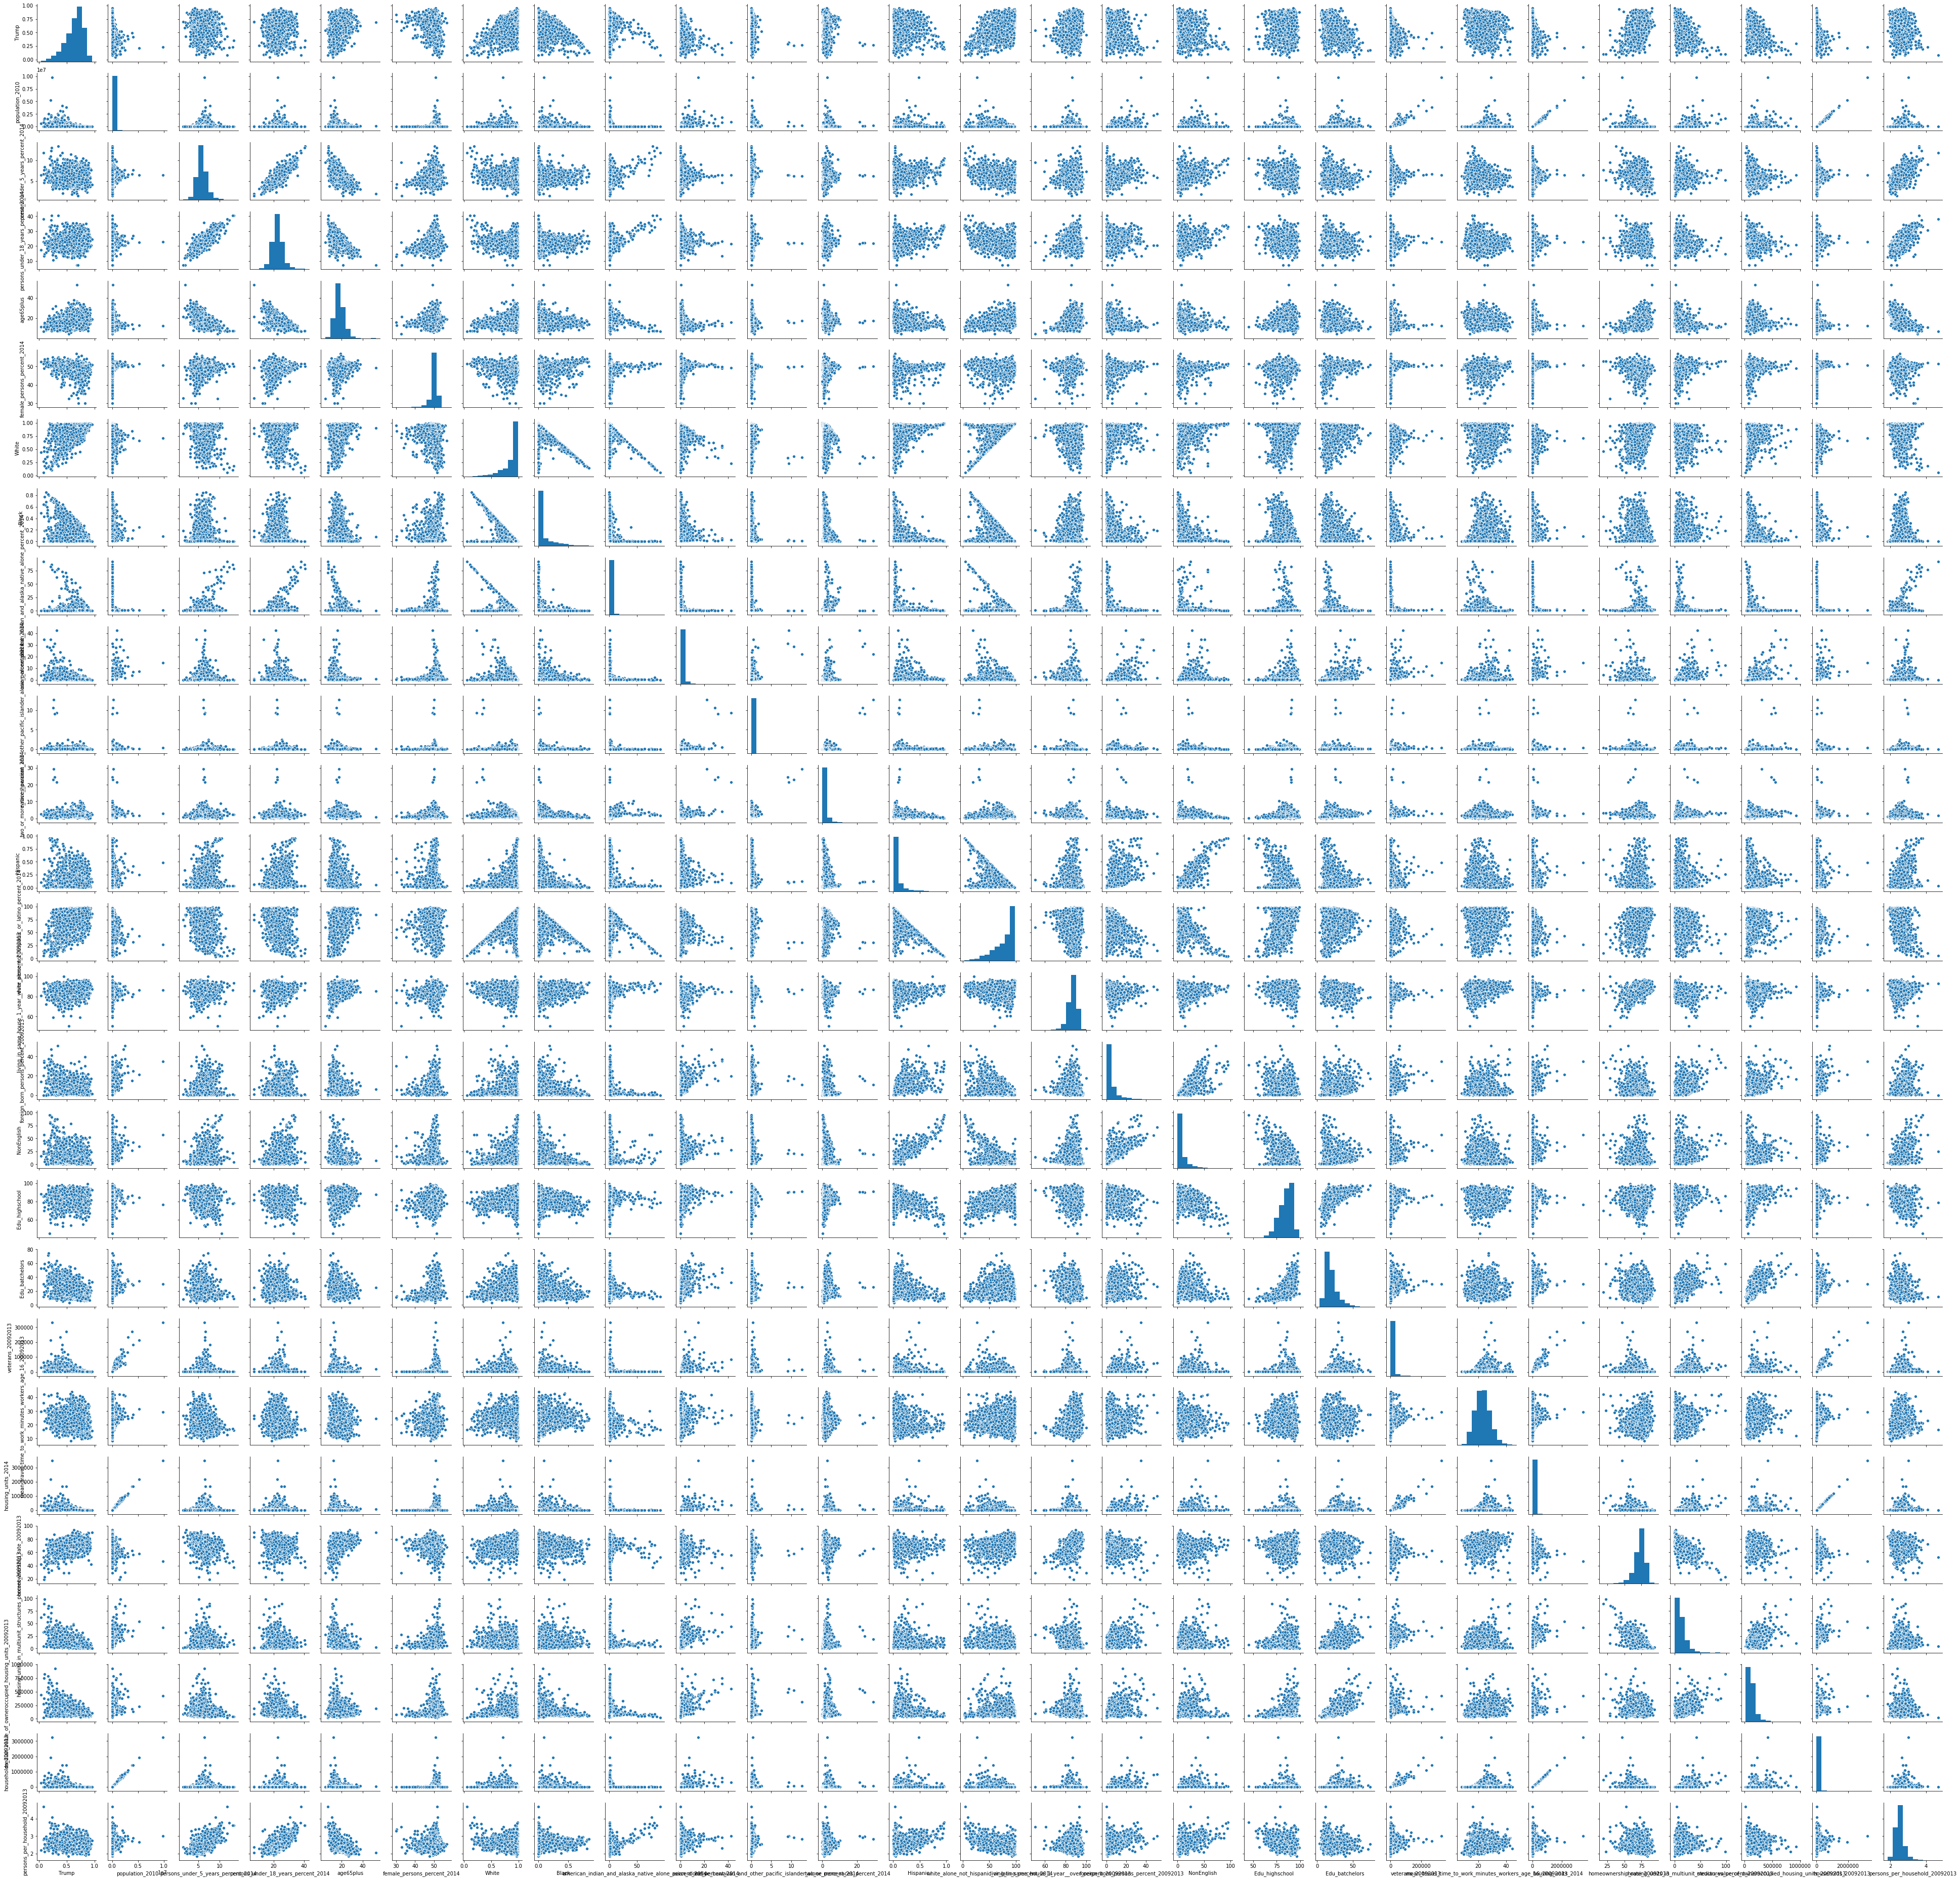

In [34]:
import seaborn as sns
sns.pairplot(people_data);
plt.tight_layout();

In [37]:
#sns.pairplot(business_data);
#plt.tight_layout();

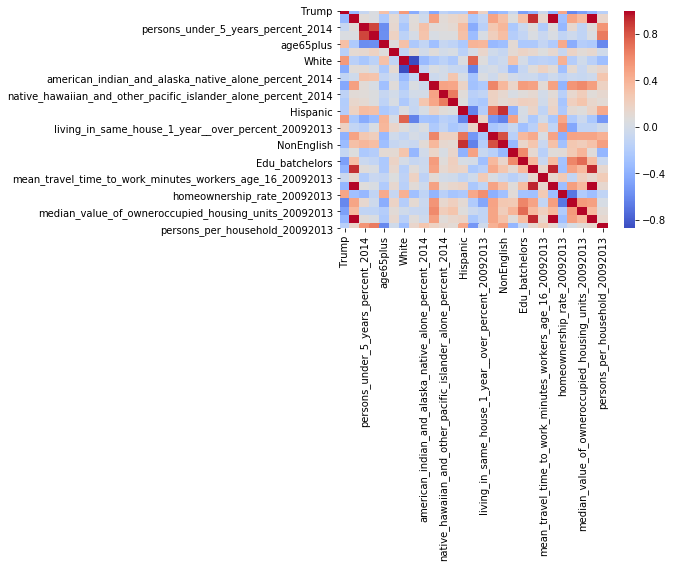

In [41]:
sns.heatmap(people_data.corr(), cmap="coolwarm");

In [43]:
people_data.corr()

# Independent variables showing strongest positive correlation with 'Trump':
# White, white_alone_not_hispanic_or_latino_percent_2014, homeownership_rate_20092013

Trump  population_2010  \
Trump                                               1.000000        -0.348121   
population_2010                                    -0.348121         1.000000   
persons_under_5_years_percent_2014                 -0.088072         0.088620   
persons_under_18_years_percent_2014                 0.034943         0.047701   
age65plus                                           0.323061        -0.220223   
female_persons_percent_2014                        -0.169974         0.118712   
White                                               0.529662        -0.158505   
Black                                              -0.425173         0.085908   
american_indian_and_alaska_native_alone_percent... -0.113174        -0.036649   
asian_alone_percent_2014                           -0.446637         0.495754   
native_hawaiian_and_other_pacific_islander_alon... -0.140944         0.095663   
two_or_more_races_percent_2014                     -0.199688         0.146555   
Hispanic                                           -0.188423         0.189579   
white_alone_not_hispanic_or_latino_percent_2014     0.536108        -0.241514   
living_in_same_house_1_year__over_percent_20092013  0.197965        -0.108779   
foreign_born_persons_percent_20092013              -0.395191         0.480852   
NonEnglish                                         -0.326459         0.319868   
Edu_highschool                                     -0.090119         0.063488   
Edu_batchelors                                     -0.487249         0.321674   
veterans_20092013                                  -0.371746         0.925340   
mean_travel_time_to_work_minutes_workers_age_16... -0.054170         0.143115   
housing_units_2014                                 -0.365274         0.993163   
homeownership_rate_20092013                         0.468215        -0.297278   
housing_units_in_multiunit_structures_percent_2... -0.604528         0.473371   
median_value_of_owneroccupied_housing_units_200... -0.485883         0.356462   
households_20092013                                -0.363137         0.996156   
persons_per_household_20092013                     -0.170575         0.157320   

                                                    persons_under_5_years_percent_2014  \
Trump                                                                        -0.088072   
population_2010                                                               0.088620   
persons_under_5_years_percent_2014                                            1.000000   
persons_under_18_years_percent_2014                                           0.856156   
age65plus                                                                    -0.585086   
female_persons_percent_2014                                                   0.132132   
White                                                                        -0.246108   
Black                                                                         0.094859   
american_indian_and_alaska_native_alone_percent...                            0.317460   
asian_alone_percent_2014                                                      0.093945   
native_hawaiian_and_other_pacific_islander_alon...                            0.090974   
two_or_more_races_percent_2014                                                0.117160   
Hispanic                                                                      0.349552   
white_alone_not_hispanic_or_latino_percent_2014                              -0.420170   
living_in_same_house_1_year__over_percent_20092013                           -0.159853   
foreign_born_persons_percent_20092013                                         0.275550   
NonEnglish                                                                    0.379079   
Edu_highschool                                                               -0.229239   
Edu_batchelors                                                              

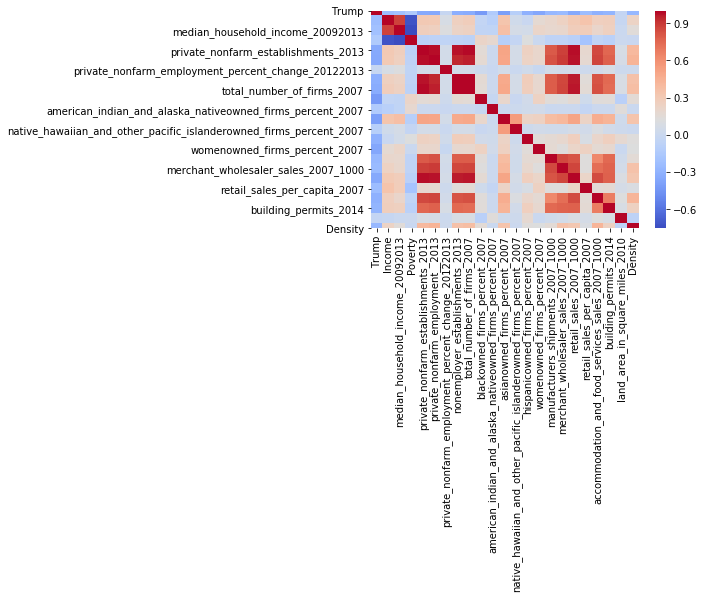

In [45]:
sns.heatmap(business_data.corr(), cmap="coolwarm");

#business_data.corr()

# No independent variables show positive correlation with 'Trump' but the least negative relationship is:
# private_nonfarm_employment_percent_change_20122013

In [ ]:
# Based on correlation coefficients, the best predictors for 'Trump' variable are:
# 'White'
# 'white_alone_not_hispanic_or_latino_percent_2014'
# 'homeownership_rate_20092013'
# 'private_nonfarm_employment_percent_change_20122013'

### 3.3 Fit a linear regression model with just ONE independent variable 

Using your exploratory data analysis above, pick **one** independent variable that you think is strongly associated with Trump support. Enter the column name of that feature here, as a string:

In [46]:
feature_name = 'White'

Enter the column name of our dependent variable here, as a string:

In [47]:
response_name = 'Trump'

Initialise a linear regression model using scikit-learn

In [48]:
trump_model = LinearRegression() # initialise 

# independent variable(s)
X_train = np.array(training_data[feature_name]).reshape(-1, 1)

# target variable
y_train = training_data[response_name]

trump_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Inspect the coefficient and intercept of the learned model, and plot the actual values of your dependent vs independent variable against the line of best fit, as in our dummy example above. 

In [50]:
trump_coeff = trump_model.coef_
trump_coeff

array([0.52501458])

In [51]:
trump_intercept = trump_model.intercept_
trump_intercept

0.18778851284621645

Using these values compute y_predictions, which is the line of best fit for our data.  

In [52]:
trump_y_pred = trump_coeff[0]*X_train + trump_intercept

Plot our data against the line of best fit - don't forget to add labels for the x and y axes

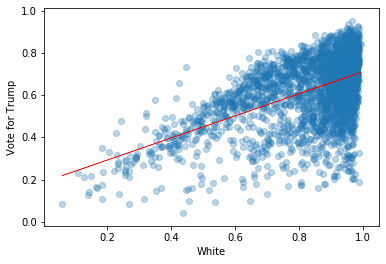

In [53]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, alpha=0.3);
plt.plot(X_train, trump_y_pred, 'r', linewidth=0.5);
plt.xlabel('White');
plt.ylabel('Vote for Trump');
plt.show();

In [ ]:
# You can do the same with 'Black' or 'female_person_percent_2014' and it will show more 'anti-correlation' 
# i.e. the more blacks, the less votes for Trump

Now calculate the mean squared error of our trained model.

In [54]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, trump_y_pred)
rmse = np.sqrt(mse)

print('Mean squared error: %f'% mse)
print('Root mean squared error: %f'% rmse)

Mean squared error: 0.017615
Root mean squared error: 0.132722


On your table, discuss which feature you chose and why, and compare root mean squared errors. 

### 3.4 Test our simple linear model on out of sample data

Now we've trained our simple linear model, we can read in our testing data. 

In [55]:
testing_data = pd.read_csv('./data/us_presidential_votes_test.csv')
testing_data.head()

Trump  population_2010  persons_under_5_years_percent_2014  \
0  0.753000             5548                                 4.2   
1  0.702912            39839                                 5.9   
2  0.691729           122979                                 5.2   
3  0.861691            17021                                 4.4   
4  0.742228            35021                                 5.2   

   persons_under_18_years_percent_2014  age65plus  \
0                                 19.0       20.8   
1                                 23.6       16.8   
2                                 19.8       16.9   
3                                 18.5       18.3   
4                                 19.4       17.0   

   female_persons_percent_2014  White  Black  \
0                         50.1  0.977  0.007   
1                         50.6  0.937  0.036   
2                         51.1  0.921  0.043   
3                         44.9  0.921  0.061   
4                         51.1  0.888  0.082   

   american_indian_and_alaska_native_alone_percent_2014  \
0                                                0.3      
1                                                0.4      
2                                                0.4      
3                                                0.4      
4                                                0.3      

   asian_alone_percent_2014  ...  hispanicowned_firms_percent_2007  \
0                       0.2  ...                               0.0   
1                       0.7  ...                               0.0   
2                       1.4  ...                               1.0   
3                       0.2  ...                               0.0   
4                       1.2  ...                               0.0   

   womenowned_firms_percent_2007  manufacturers_shipments_2007_1000  \
0                           23.7                                  0   
1                           21.8                             852303   
2                           21.7                            1577657   
3                           23.8                             109872   
4                           26.5                                  0   

   merchant_wholesaler_sales_2007_1000  retail_sales_2007_1000  \
0                                    0                    9185   
1                                    0                  373696   
2                              1090845                 1869147   
3                                38046                   66626   
4                                    0                  265377   

   retail_sales_per_capita_2007  \
0                          1692   
1                          9363   
2                         16014   
3                          4020   
4                          7986   

   accommodation_and_food_services_sales_2007_1000  building_permits_2014  \
0                                                0                      0   
1                                            28791                     52   
2                                           247065                    654   
3                                             8470                      1   
4                                                0                     33   

   land_area_in_square_miles_2010  Density  
0                          273.42     20.3  
1                          432.68     92.1  
2                          326.47    376.7  
3                          734.10     23.2  
4                          580.36     60.3  

[5 rows x 49 columns]

We can use our model to predict Trump vote share in these new counties, based on our chosen independent variable for those counties.

In [56]:
y_test = testing_data['Trump']
X_test = np.array(testing_data[feature_name]).reshape(-1, 1)

y_pred = trump_model.predict(X_test)

We can plot our test data against our line of best fit

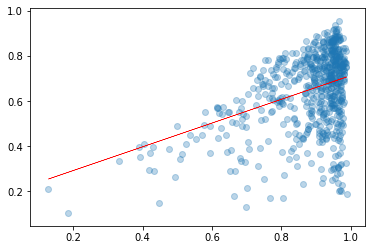

In [57]:
plt.scatter(X_test, y_test, alpha=0.3);
plt.plot(X_test, y_pred, 'r', linewidth=0.5);
plt.xlabel('');
plt.ylabel('');
plt.show();

We can also evaluate the accuracy of our model on unseen data, using root mean squared error

In [58]:
# If there is significant difference between these results and training data results then the model is not generalized enough
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean squared error: %f'% mse)
print('Root mean squared error: %f'% rmse)

Mean squared error: 0.024779
Root mean squared error: 0.157413


## 4. Multiple linear regression

Now let's build a more complex model, using **multiple** available features to predict the strength of the Trump vote. Fill in the cells below to do this. 


Start by intialising a linear regression model; call it `trump_model_multi`

In [61]:
trump_model_multi = LinearRegression()

Now define the features and response for our training data

In [62]:
# extract an array of features from the training_data dataframe
feature_cols = [
    "White", 
    "white_alone_not_hispanic_or_latino_percent_2014", 
    "homeownership_rate_20092013", 
    "private_nonfarm_employment_percent_change_20122013"]

X_train = training_data[feature_cols]

# extract the values of Trump vote percentage
y_train = training_data['Trump']  


Now fit the model to this data

In [63]:
trump_model_multi.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Inspect the coefficients and intercept

In [64]:
trump_model_multi.coef_

array([2.50927785e-01, 1.78296675e-03, 5.18214025e-03, 1.28163120e-04])

In [65]:
trump_model_multi.intercept_

-0.09070435574183655

Use this model to predict Trump support in our out-of-sample counties

In [66]:
# Cannot visualize with 49 lines plotted on graph (one line per feature) - it will break your computer! 
# We use metrics to evaluate
X_test = testing_data[feature_cols]
y_test = testing_data['Trump']

y_pred = trump_model_multi.predict(X_test)

Compute the root mean squared error of this model

In [67]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean squared error: %f'% mse)
print('Root mean squared error: %f'% rmse)

Mean squared error: 0.022204
Root mean squared error: 0.149010


Does adding more features improve model performance compared to our simple linear regression model? 

In [ ]:
# Yes! We improved by a little
# More data, the better the model gets, but don't train on the whole dataset!
# If you can remove a variable and get the same MSE/RMSE results, then do it - LEANER PRODUCT!!!
# e.g. will the model improve if you remove column "private_nonfarm_employment_percent_change_20122013"?

In [68]:
X_cols = [
    "White", 
    "white_alone_not_hispanic_or_latino_percent_2014", 
    "homeownership_rate_20092013"]

X_train_2 = training_data[X_cols]

# extract the values of Trump vote percentage
y_train = training_data['Trump']  

In [69]:
trump_model_multi.fit(X_train_2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
X_test_2 = testing_data[X_cols]
y_test = testing_data['Trump']

y_pred_2 = trump_model_multi.predict(X_test_2)

In [71]:
mse = mean_squared_error(y_test, y_pred_2)
rmse = np.sqrt(mse)

print('Mean squared error: %f'% mse)
print('Root mean squared error: %f'% rmse)

Mean squared error: 0.022217
Root mean squared error: 0.149055


In [ ]:
# No, the model is slightly worse but only by difference of 0.0001 